http://www.b3.com.br/data/files/C8/F3/08/B4/297BE410F816C9E492D828A8/SeriesHistoricas_Layout.pdf

,0 <br>
0,00COTAHIST.2024BOVESPA 0240907   <br>                                                                                                                                                                                                                   
1,012024010202AALR3       010ALLIAR      ON      NM   R$  000000000102000000000010360000000000850000000000093200000000008500000000000850000000000085201993000000000000430400000000000401487500000000000000009999123100000010000000000000BRAALRACNOR6102<br>

...


1763320,012024090682YDUQX846    080YDUQE       ON      NM000R$  000000000003100000000000480000000000031000000000004300000000000480000000000000000000000005000002000000000000000400000000000000017500000000000084602024122000000010000000000000BRYDUQACNOR3105
1763321,99COTAHIST.2024BOVESPA 2024090700001763322   

In [9]:
ticker = 'VALE'
ano = '2024'
data_path = '/home/yair/GHub/Codigos-em-financas/data'
nome_arquivo = f'COTAHIST_A{ano}'
url = f'https://bvmf.bmfbovespa.com.br/InstDados/SerHist/{nome_arquivo}.ZIP'


In [10]:
import pandas as pd
import statistics
import os
import zipfile

In [11]:
def baixar(url,download_dir=data_path,nome_arquivo=nome_arquivo):
    import time
    from selenium import webdriver
    # Configurações do Chrome para baixar o arquivo automaticamente
    opts = webdriver.ChromeOptions()
    opts.add_experimental_option("detach", True)
    opts.add_experimental_option("prefs", {
        "download.default_directory": download_dir,
        "download.prompt_for_download": False,
        "download.directory_upgrade": True,
        "safebrowsing.enabled": True})

    driver = webdriver.Chrome(options=opts)

    # Iniciar o download
    driver.get(url)

    # Função para aguardar até o download terminar
    def esperar_download_terminar(download_dir, nome_arquivo):
        file_path = os.path.join(download_dir, nome_arquivo)
        while not os.path.exists(file_path):
            time.sleep(1)  # Espera 1 segundo antes de checar novamente
        return file_path

    try:
        # Aguardar até que o download termine
        esperar_download_terminar(download_dir, nome_arquivo)
        print("Download concluído.")
    finally:
        # Fechar o WebDriver
        driver.quit()


In [12]:
os.chdir(data_path)

try:
    with zipfile.ZipFile(f'{nome_arquivo}.ZIP', 'r') as zip_ref:
        with zip_ref.open(f'{nome_arquivo}.TXT') as file:
            data = pd.read_csv(file,header=None) 
except:        
    baixar(url,data_path,f'{nome_arquivo}.ZIP')

    with zipfile.ZipFile(f'{nome_arquivo}.ZIP', 'r') as zip_ref:
        with zip_ref.open(f'{nome_arquivo}.TXT') as file:
            data = pd.read_csv(file,header=None)    
    

In [13]:
n=726
data.iloc[n][0]

'012024010214MILL11      010IT NOW MILL CI           R$  000000000507100000000050970000000005017000000000506200000000050970000000005016000000000539700005000000000000000007000000000000035440000000000000009999123100000010000000000000BRMILLCTF018100'

CODNEG - CÓDIGO DE NEGOCIAÇÃO DO PAPEL (12) 13:24<br>
DATA DO PREGÃO FORMATO “AAAAMMDD” (08) 03:10<br>
CÓDIGO BDI 02 lote padrão, 96 fracionario, 50 leilao ... 11:12 <br>
TPMERC - TIPO DE MERCADO 010 VISTA, 017 LEILÃO, 020 FRACIONÁRIO ... 25:27

In [14]:
import random
for n in  random.choices(range(0,len(data)),k=10):
    papel=data.iloc[n][0][12:24]
    dia = data.iloc[n][0][2:10]
    cod = data.iloc[n][0][10:12]  
    tipo = data.iloc[n][0][24:27]  
    print(n,papel,dia, cod , tipo)

1447352 VALEJ680     20240719 78 070
812771 NTCOE192     20240418 78 070
1173524 ITUBF316     20240620 78 070
1069414 BPACR330     20240604 82 080
708076 JBSSU204     20240402 82 080
1130650 VIVA3T       20240613 62 030
948504 TRPLE252     20240513 78 070
619520 BBSEP338     20240315 82 080
1288615 RDOR3        20240819 02 010
1643761 BBASH285W4   20240820 78 070


PREÇO DE ABERTURA DO PAPELMERCADO NO PREGÃO (11) [57:69]<br>
PREÇO MÁXIMO DO PAPELMERCADO NO PREGÃO (11) [70:82]<br>
PREÇO MÍNIMO DO PAPELMERCADO NO PREGÃO (11) [83:95]<br>
PREÇO DO ÚLTIMO NEGÓCIO DO PAPEL-MERCADO NO PREGÃO (11) [109:121]

In [15]:
n=86570
open=data.iloc[n][0][56:69]
max=data.iloc[n][0][69:82]
min=data.iloc[n][0][82:95]
close=data.iloc[n][0][108:121]

print(float(open)/100,float(max)/100,float(min)/100,float(close)/100)

papel=data.iloc[n][0][12:24]
dia = data.iloc[n][0][2:10]
tipo = data.iloc[n][0][24:27]  
print(n,papel,dia, tipo)

23.81 23.96 23.72 23.84
86570 AGRO3F       20240314 020


In [17]:
# for n in range (0,len(data)):
#     if ticker in data.iloc[n][0][12:24] and data.iloc[n][0][24:27] in ['010','020']: 
        # print(data.iloc[n][0])

In [18]:
dataMinF=[]
dataMaxF=[]
dataMinP=[]
dataMaxP=[]
dataOpenF=[]
dataOpenP=[]
dataCloseF=[]
dataCloseP=[]
for n in range (0,len(data)):
  if ticker in data.iloc[n][0][12:24] and data.iloc[n][0][24:27]=='020':
    dataMinF.append([data.iloc[n][0][2:10] ,  float(data.iloc[n][0][82:95])/100])
    dataMaxF.append([data.iloc[n][0][2:10] ,  float(data.iloc[n][0][69:82])/100])
    dataOpenF.append([data.iloc[n][0][2:10] , float(data.iloc[n][0][56:69])/100])
    dataCloseF.append([data.iloc[n][0][2:10] ,float(data.iloc[n][0][108:121])/100])
  if ticker in data.iloc[n][0][12:24] and data.iloc[n][0][24:27]=='010':
    dataMinP.append([data.iloc[n][0][2:10] ,  float(data.iloc[n][0][82:95])/100])
    dataMaxP.append([data.iloc[n][0][2:10] ,  float(data.iloc[n][0][69:82])/100])
    dataOpenP.append([data.iloc[n][0][2:10] , float(data.iloc[n][0][56:69])/100])
    dataCloseP.append([data.iloc[n][0][2:10] ,float(data.iloc[n][0][108:121])/100])

In [28]:
len(dataMinF)

174

In [19]:
min=[]
for f in dataMinF : 
    for p in dataMinP:
        if p[0] == f[0] : min.append([p[1],f[1]])

max=[]
for f in dataMaxF : 
    for p in dataMaxP:
        if p[0] == f[0] : max.append([p[1],f[1]])

open=[]
for f in dataOpenF : 
    for p in dataOpenP:
        if p[0] == f[0] : open.append([p[1],f[1]])

close=[]
for f in dataCloseF : 
    for p in dataCloseP:
        if p[0] == f[0] : close.append([p[1],f[1]])        

In [29]:
min[0]

[76.59, 76.6]

In [20]:
Dif = pd.DataFrame() ## padrao -fracionario
Dif['Min']   = [(x[0] - x[1]) for x in min]
Dif['Max']   = [(x[0] - x[1]) for x in max]
Dif['Open']  = [(x[0] - x[1]) for x in open]
Dif['Close'] = [(x[0] - x[1]) for x in close]

In [21]:
Dif.describe()

,Min,Max,Open,Close
count,174.000000,174.000000,174.000000,174.000000
mean,-0.024080,-0.028966,-0.039828,-0.003276
std,0.052344,0.084553,0.117687,0.074120
min,-0.210000,-0.500000,-0.380000,-0.290000
25%,-0.040000,-0.037500,-0.100000,-0.047500
50%,-0.030000,0.000000,-0.050000,0.005000
75%,-0.010000,0.010000,0.020000,0.037500
max,0.440000,0.120000,0.430000,0.280000


In [30]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers = 'png'  ## comentar se quiser grafico interativo

fig = go.Figure()
fig.add_trace(go.Box(x=Dif['Min'] , name='Min' , boxmean='sd') )
fig.add_trace(go.Box(x=Dif['Open'] , name='Open', boxmean='sd'))
fig.add_trace(go.Box(x=Dif['Close'] , name ='Close', boxmean='sd'))
fig.add_trace(go.Box(x=Dif['Max'] , name='Max', boxmean='sd'))

fig.update_layout(
    title= f'Diferença de preço Padrão - Fracionário de {ticker}',
    xaxis=dict(
        showgrid=True,
        zeroline=True,
        dtick=.5,
        gridwidth=2,
    ),
)

fig.show()

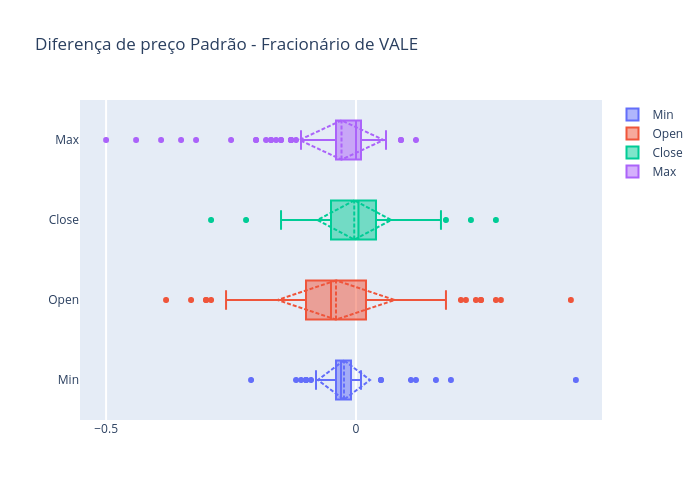

In [31]:
fig.show('png')

In [24]:
# import matplotlib.pyplot as plt
# plt.style.use('ggplot')

# fig, ax = plt.subplots(figsize=(11, 6))
# ax.boxplot((Dif['Min'], Dif['Open'] , Dif['Close'] , Dif['Max']), vert=False, showmeans=True, meanline=True,
#            labels=('Min', 'OPen' , 'Close' , 'Max'), patch_artist=True,
#            medianprops={'linewidth': 2, 'color': 'purple'},
#            meanprops={'linewidth': 2, 'color': 'red'})
# ax.set_title('Diferença de preço Fracionário x Padrão de {}'.format(papel[1]))
# plt.show()